In [39]:
import numpy as np 
import pandas as pd 
!pip install kmodes

In [40]:
data=pd.read_csv("/kaggle/input/grocery-product-prices-for-australian-states/Australia_Grocery_2022Sep.csv")
data.drop(["Postal_code","RunDate","Product_Url","tid","state","index"], axis=1,inplace=True)

In [41]:
df=data.dropna()
df=df.reset_index(drop=True)
df.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE


# K-modes

In [42]:
from kmodes.kprototypes import KPrototypes
categorical_features_idx = [0,1,2,3,5,6,9,11,12,14,15]
data=data.dropna()
data=data.reset_index(drop=True)
mark_array=data.values

In [43]:
kproto = KPrototypes(n_clusters=4, verbose=2, max_iter=10).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 1510, ncost: 481267.47642169066
Run: 1, iteration: 2/10, moves: 758, ncost: 420441.62231561
Run: 1, iteration: 3/10, moves: 263, ncost: 404232.8205125175
Run: 1, iteration: 4/10, moves: 214, ncost: 366870.43228800123
Run: 1, iteration: 5/10, moves: 104, ncost: 348320.7008542024
Run: 1, iteration: 6/10, moves: 96, ncost: 343040.3573724026
Run: 1, iteration: 7/10, moves: 56, ncost: 340114.3269467801
Run: 1, iteration: 8/10, moves: 35, ncost: 339278.028588439
Run: 1, iteration: 9/10, moves: 0, ncost: 339278.028588439
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 2613, ncost: 468100.6025182089
Run: 2, iteration: 2/10, moves: 542, ncost: 463032.4485085046
Run: 2, iteration: 3/10, moves

In [44]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['8.58774285714288' '0.10285714285714286' '0.7571428571428571'
  '10.13654285714282' '33.95468571428578' 'Meat & seafood' 'Cheese'
  'Nuts & trail mix' 'Natural Sliced Almonds' '$40.00 per 1Kg' '200g'
  'False' 'Coles' '5645739P' '1Kg' 'DEVONPORT']
 ['17.546610526315888' '0.24421052631578946' '0.6378947368421053'
  '22.47877894736842' '6.546084210526307' 'Drinks' 'Soft drinks'
  'Soft drink cans' 'Free Range Pork Leg Roast Boneless' '$3.20 per 1L'
  '1kg' 'False' 'Coles' '2741871P' '1L' 'ILPARPA']
 ['4.252382711488727' '0.01791651274473587' '0.5700036941263391'
  '5.637210934613973' '3.0316992981159934' 'Pantry'
  'Chips, crackers & snacks' 'Muesli bars & fruit snacks'
  'Chilli Potato Chips' '$1.43 per 100G' '500g' 'False' 'Coles'
  '2670060P' '100G' 'SWAN HILL']
 ['9.206593406593214' '0.01098901098901099' '0.8571428571428571'
  '10.532637362637374' '84.58021978021814' 'Meat & seafood' 'Seafood'
  'Prepacked seafood' 'Tasmanian Smoked Salmon With A Hint Of Lemon'
  '$96.00 per 1Kg' '

In [45]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
data['cluster'] = list(clusters)
data.head(2)

,Category,Sub_category,Product_Group,Product_Name,Package_price,Price_per_unit,package_size,is_estimated,is_special,in_stock,Retail_price,Brand,Sku,unit_price,unit_price_unit,city,cluster
0,Meat & seafood,Poultry,Drumsticks & maryland,RSPCA Approved Chicken Drumsticks,7.0,$3.50 per 1Kg,2kg,0,1,False,8.0,Coles,2263260P,3.5,1Kg,TEMPE,2
1,Meat & seafood,Beef & veal,Beef steaks,Beef Chuck Casserole Steak,17.1,$18.00 per 1Kg,approx. 950g,1,1,False,19.0,Coles,3331172P,18.0,1Kg,TEMPE,1


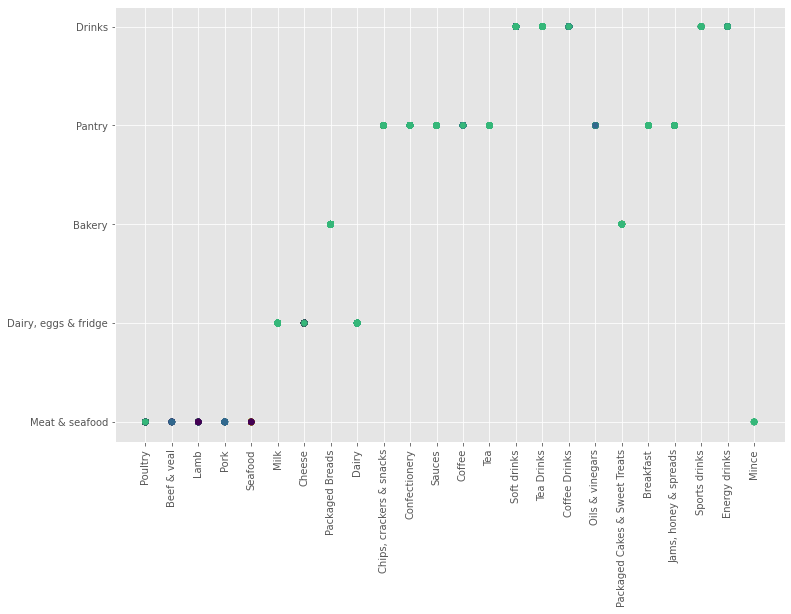

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "Sub_category"], data.loc[:,"Category"], c=clusters)
plt.xticks(rotation=90)
plt.show()

In [47]:
data.columns

Index(['Category', 'Sub_category', 'Product_Group', 'Product_Name',
       'Package_price', 'Price_per_unit', 'package_size', 'is_estimated',
       'is_special', 'in_stock', 'Retail_price', 'Brand', 'Sku', 'unit_price',
       'unit_price_unit', 'city', 'cluster'],
      dtype='object')

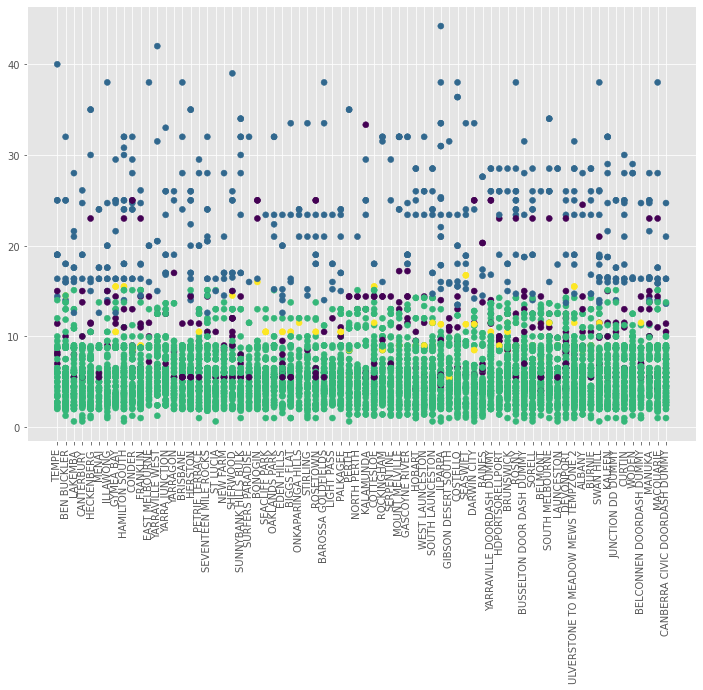

In [48]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use("ggplot")
plt.figure(figsize=(12,8))
plt.scatter(data.loc[:, "city"], data.loc[:,"Retail_price"], c=clusters)
plt.xticks(rotation=90)
plt.show()

![](https://miro.medium.com/max/828/1*WhKA9Jboj_1sHa0MbWQQ7w.webp)

In [50]:
!pip install prince

In [61]:
df.columns

Index(['Category', 'Sub_category', 'Product_Group', 'Product_Name',
       'Package_price', 'Price_per_unit', 'package_size', 'is_estimated',
       'is_special', 'in_stock', 'Retail_price', 'Brand', 'Sku', 'unit_price',
       'unit_price_unit', 'city'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330 entries, 0 to 6329
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         6330 non-null   object 
 1   Sub_category     6330 non-null   object 
 2   Product_Group    6330 non-null   object 
 3   Product_Name     6330 non-null   object 
 4   Package_price    6330 non-null   float64
 5   Price_per_unit   6330 non-null   object 
 6   package_size     6330 non-null   object 
 7   is_estimated     6330 non-null   int64  
 8   is_special       6330 non-null   int64  
 9   in_stock         6330 non-null   object 
 10  Retail_price     6330 non-null   float64
 11  Brand            6330 non-null   object 
 12  Sku              6330 non-null   object 
 13  unit_price       6330 non-null   float64
 14  unit_price_unit  6330 non-null   object 
 15  city             6330 non-null   object 
 16  cluster          6330 non-null   int16  
dtypes: float64(3),

In [64]:
g={"num":["Package_price","is_estimated","is_special","Retail_price","unit_price"],
  "cat":['Category', 'Sub_category', 'Product_Group', 'Product_Name', 'Price_per_unit', 'package_size', 'is_estimated',
       'is_special', 'in_stock', 'Brand', 'Sku', 'city']}

In [66]:
from prince import MFA
mfa = MFA(groups = g, n_components = 2, n_iter = 3, random_state = 101)
mfa.fit_transform(df)

ValueError: Not all columns in "cat" group are of the same type

****

In [58]:
import prince
mca = prince.MCA(df)
mca.fit(df)


TypeError: can only concatenate str (not "int") to str